In [ ]:
from keras.datasets import cifar10


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
#load cifer10 dataset and split it.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
#change train data and test data into float32 and divide by 255
#That normalizes data from 1 to 0.
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255

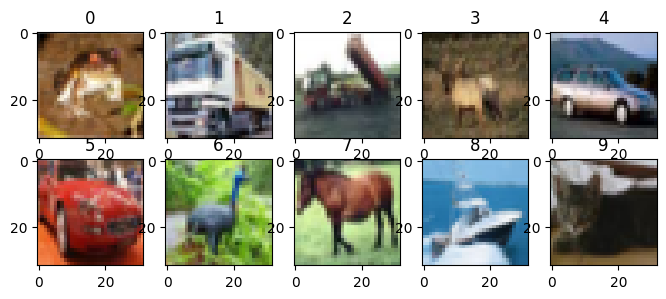

In [ ]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.title(i)
    plt.imshow(x_train[i].reshape(32,32,3))

In [ ]:
#build the model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [ ]:
#model fitting
result=model.fit(x_train, y_train,batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 233s 597ms/step - loss: 0.5095 - accuracy: 0.8228
Epoch 2/10
391/391 [==============================] - 233s 596ms/step - loss: 0.3854 - accuracy: 0.8690
Epoch 3/10
391/391 [==============================] - 229s 586ms/step - loss: 0.2695 - accuracy: 0.9108
Epoch 4/10
391/391 [==============================] - 233s 596ms/step - loss: 0.1788 - accuracy: 0.9441
Epoch 5/10
391/391 [==============================] - 229s 585ms/step - loss: 0.1074 - accuracy: 0.9681
Epoch 6/10
391/391 [==============================] - 237s 607ms/step - loss: 0.0783 - accuracy: 0.9771
Epoch 7/10
391/391 [==============================] - 233s 596ms/step - loss: 0.0689 - accuracy: 0.9792
Epoch 8/10
391/391 [==============================] - 233s 597ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 9/10
391/391 [==============================] - 234s 599ms/step - loss: 0.0511 - accuracy: 0.9843
Epoch 10/10
391/391 [==============================] - 232s 594m

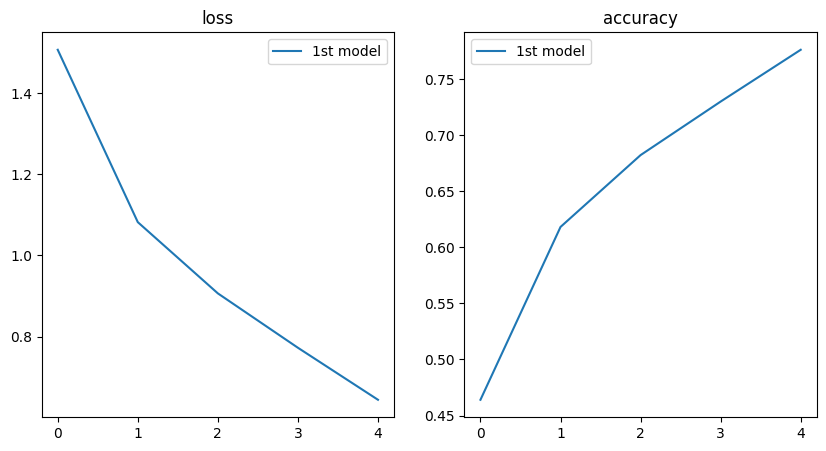

In [ ]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric)
    plt_result1 = result1.history[metric]
    #plt_result2 = result2.history[metric]

    #plot them all
    plt.plot(plt_result1, label='1st model')
    #plt.plot(plt_result2, label='2nd model')
    plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

NameError: ignored

In [ ]:
plt.imshow(x_test.reshape(32,32,3))


NameError: ignored

In [ ]:
#Let's predict.
prediction=model.predict(x_test)
prediction

313/313 [==============================] - 12s 38ms/step


array([[2.2275202e-02, 6.1853067e-04, 2.2025941e-02, ..., 6.9885636e-03,
        1.8810403e-02, 3.5809024e-04],
       [1.8655113e-03, 1.5400490e-01, 2.6070504e-06, ..., 4.7352135e-08,
        8.4337682e-01, 7.4775465e-04],
       [6.1983157e-02, 2.0790724e-02, 1.7261818e-03, ..., 1.8117812e-03,
        8.8511294e-01, 2.1957623e-02],
       ...,
       [2.2178346e-04, 4.8004827e-06, 5.6988925e-02, ..., 4.6850424e-03,
        3.3772428e-04, 6.0036082e-06],
       [3.8041114e-03, 9.7713649e-01, 1.0125232e-03, ..., 4.7688634e-05,
        4.5483856e-05, 2.2236044e-03],
       [1.7800684e-06, 5.0986368e-06, 5.6954177e-05, ..., 9.8374224e-01,
        7.8308250e-07, 3.9125575e-06]], dtype=float32)

In [ ]:
names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#Preparation for this predction.
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in names]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],"!")

The answer is airplane !
